In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os
import sqlite3
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpim

In [5]:
conn = sqlite3.connect('auto_data.db')
auto_data = pd.read_csv('car_noise_data2.csv', encoding = 'unicode_escape')
auto_data.to_sql('auto_data', conn, if_exists='replace')

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


Showing the entire raw database

In [20]:
ae = pd.read_sql("SELECT * FROM auto_data", conn)
#SP_RENAME ('Acura\nTL', 'Acura TL', 'OBJECT')
ae.rename(
    columns={
        'dB_at_idle': 'Noise Level in db at idle', 
        'dB_at_100kmh': 'Noise Level in db at 100 kmh (60mph)',
        'Model Year.1': 'Model Year',
        'spec' : 'Model Specification'
        }, 
    inplace=True)
#Showing the entire raw database.
ae

,index,Brand + Model,Model Specification,Model Year,Noise Level in db at idle,Noise Level in db at 100 kmh (60mph),Model Year,Body Style,Number of Cylinders,Fuel,Model Drive,Transmission Type,Displacement in Litres,Engine Power (HP),Weight in lbs,Country of Origin
0,0,Acura\nTL,3.7 V6,2010,39.9,56.2,2010,Sedan,6,Gasoline,AWD,Automatic,3.7,305,3962,USA
1,1,Audi \nA8,3.0 TDI,2014,39.7,60.9,2014,Midsize,6,Gasoline - Premium,All Wheel Drive,Automatic,3.0,328,4365,Germany
2,2,BMW\nM3,M3,2013,48.0,67.9,2013,Coupe,8,Gasoline,Rear,6-speed manual,4.0,408,3704,Germany
3,3,Buick\nRegal,CXL 2.4,2011,44.5,64.9,2011,Sedan,4,Gasoline,Front,Automatic,2.4,182,3600,USA
4,4,Cadillac \nEscalade,6.2 V8,2016,38.4,65.8,2016,SUV,8,Flex-Fuel (Unleaded/E85),Four Wheel Drive,Automatic,6.2,414,12886,USA
5,5,Chevrolet \nCorvette,ZR1,2012,54.4,66.0,2012,Coupe,8,Gasoline,Rear,6-speed manual,6.2,638,3333,USA
6,6,Chrysler \n300,300,2011,40.9,60.4,2011,Sedan,8,Gasoline,Rear,Automatic,5.7,363,4270,USA
7,7,Dodge \nRam,5.7 V8,2010,39.2,55.3,2010,Pickup,8,Gasoline,4WD,Automatic,4.7,310,5593,USA
8,8,Dodge \nChallenger,SRT8,2011,51.2,66.7,2011,Coupe,8,Gasoline,Rear,Manual,6.4,470,5300,USA
9,9,Dodge \nViper,SRT-10,2008,61.3,75.0,2008,Roadster,10,Gasoline,Rear,Manual,8.3,499,3530,USA


Showing an image of a noise level chart to get one a perspective of what the noise level means

<Figure size 3600x3600 with 0 Axes>

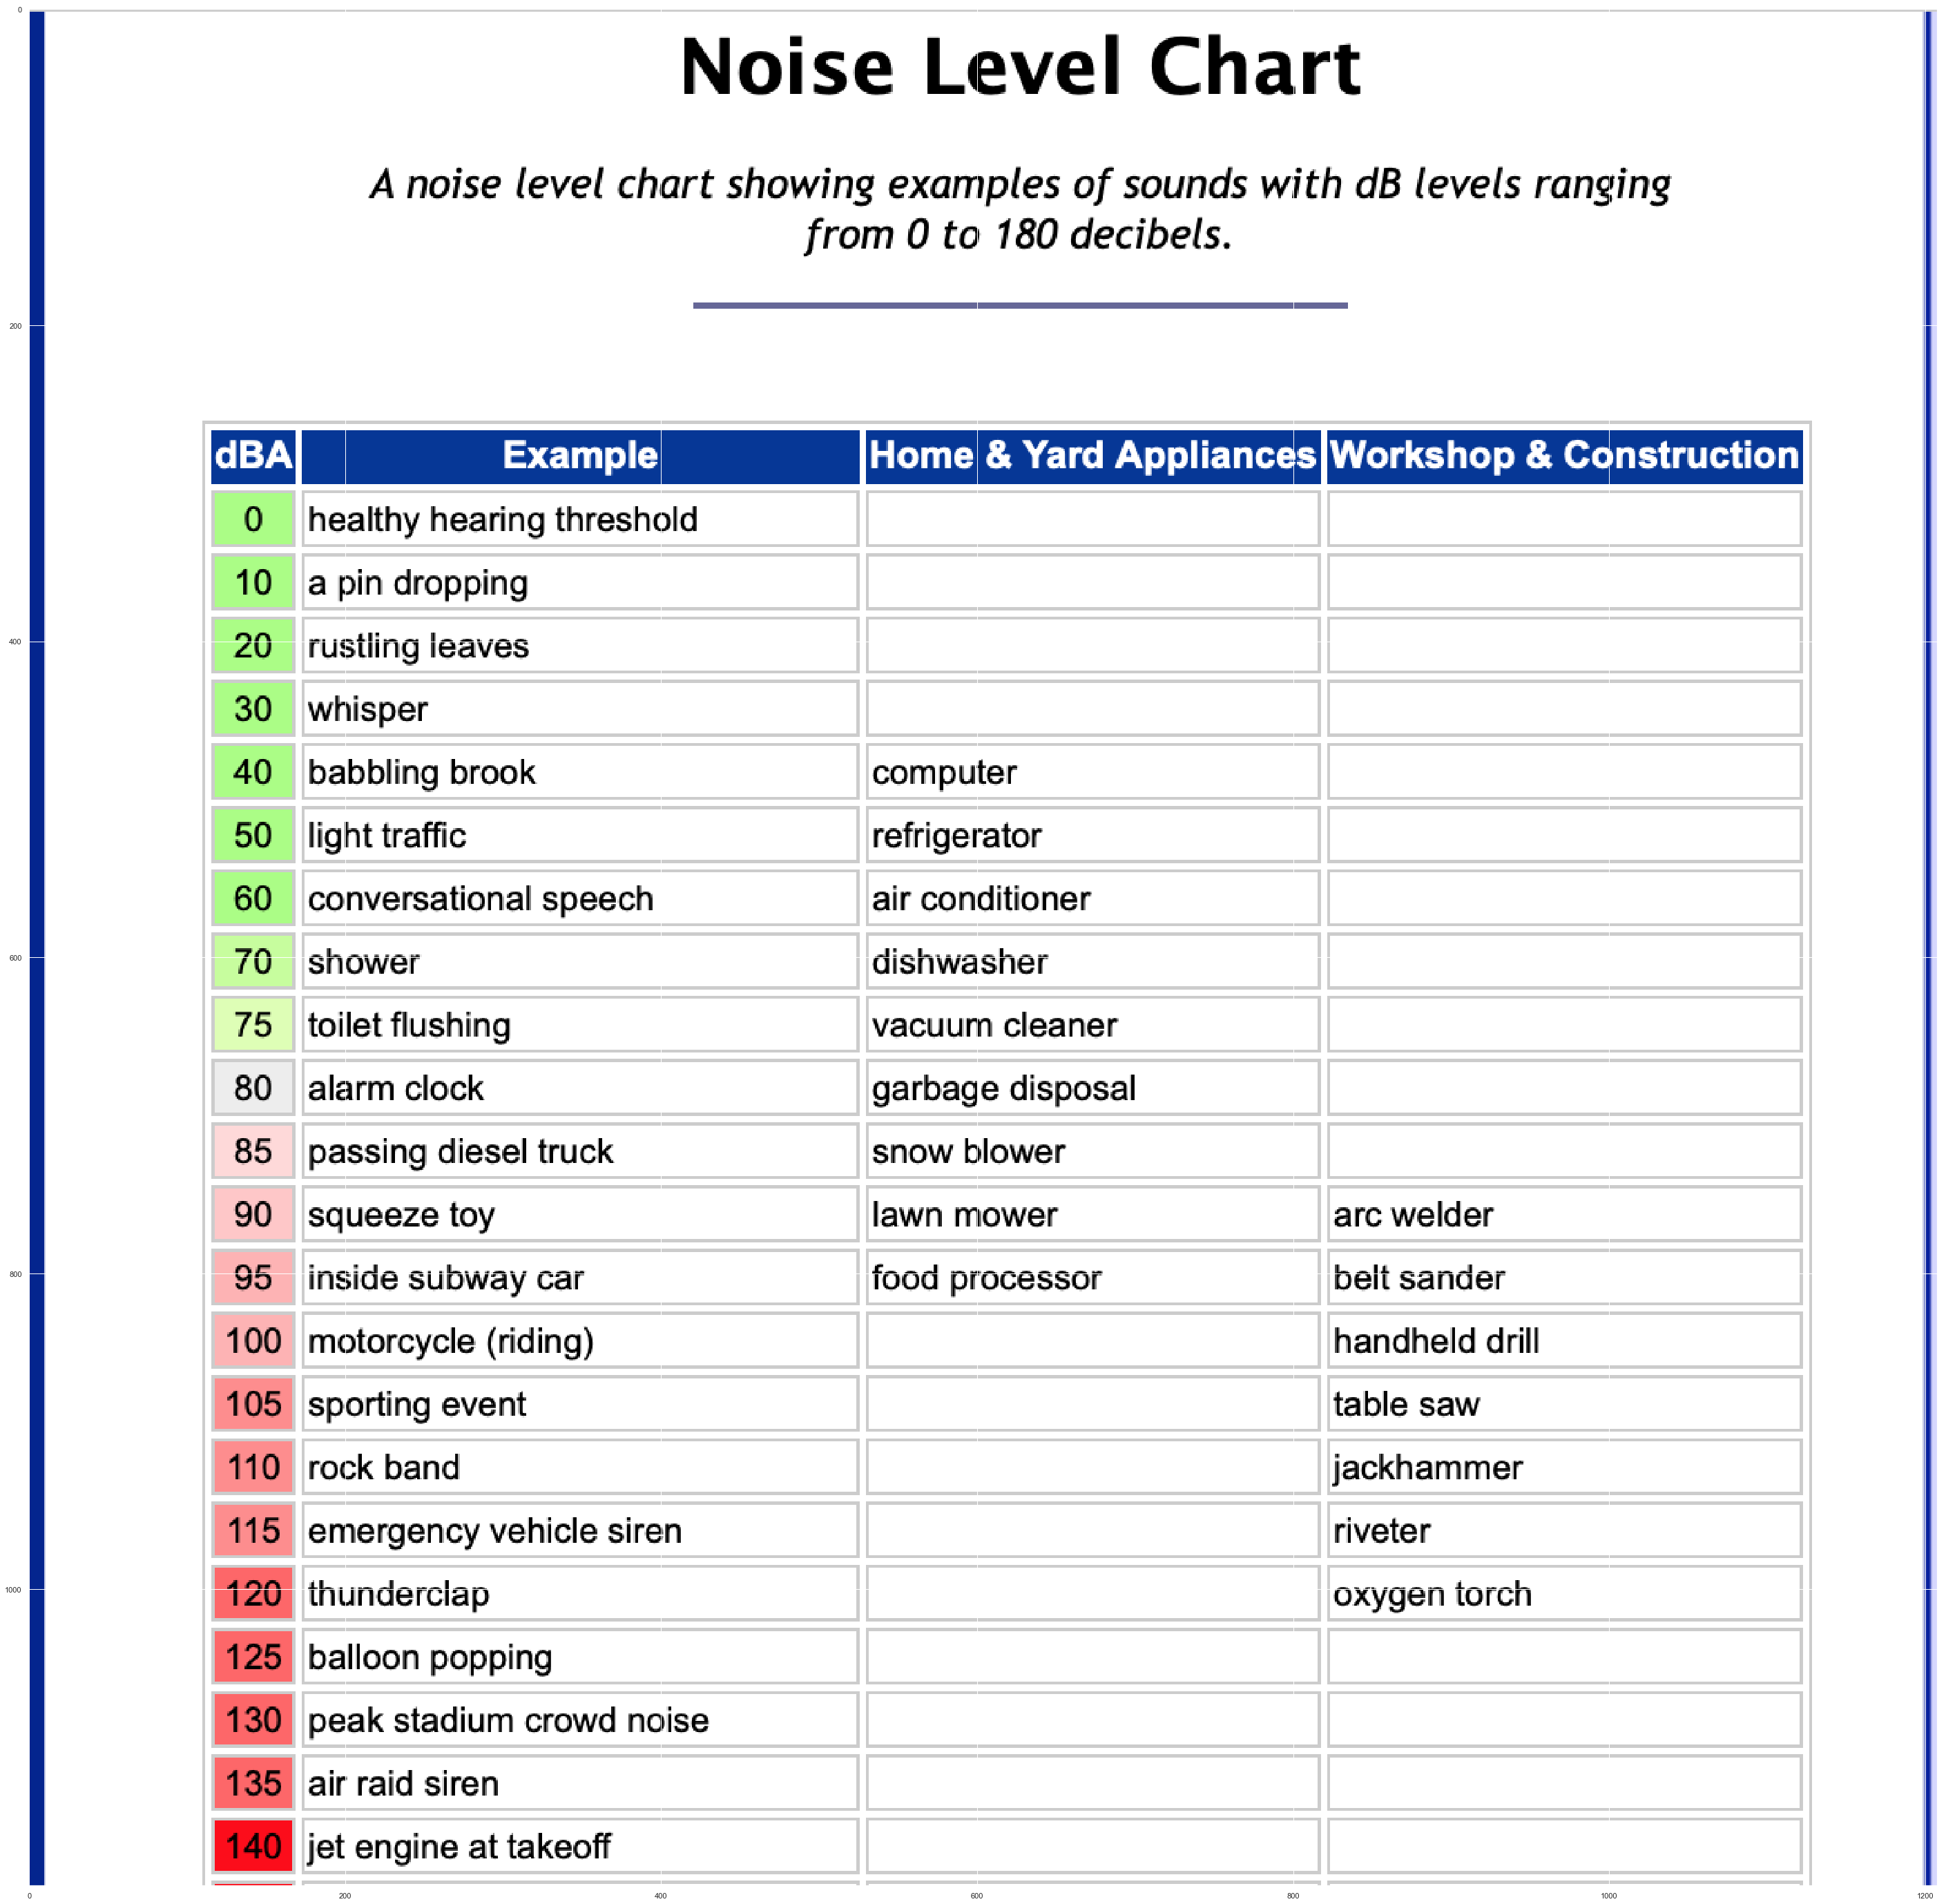

In [104]:
image = mpim.imread("Untitled.png")
plt.figure(figsize=(50,50))
plt.imshow(image)

plt.show()

# Showing an image of a noise level chart to get one a perspective of what the noise level means.

Showing the Model and the noise levels inside the car at both idle and at 60 MPH

In [105]:
ad = pd.read_sql("SELECT [Brand + Model], [dB_at_idle], [dB_at_100kmh] FROM auto_data", conn)
ad.rename(
    columns={
        'dB_at_idle': 'Noise Level in db at idle', 
        'dB_at_100kmh': 'Noise Level in db at 100 kmh (60mph)'
        }, 
    inplace=True)

ad
#Showing the Model and the noise levels inside the car at both idle and at 60 MPH.

,Brand + Model,Noise Level in db at idle,Noise Level in db at 100 kmh (60mph)
0,Acura\nTL,39.9,56.2
1,Audi \nA8,39.7,60.9
2,BMW\nM3,48.0,67.9
3,Buick\nRegal,44.5,64.9
4,Cadillac \nEscalade,38.4,65.8
5,Chevrolet \nCorvette,54.4,66.0
6,Chrysler \n300,40.9,60.4
7,Dodge \nRam,39.2,55.3
8,Dodge \nChallenger,51.2,66.7
9,Dodge \nViper,61.3,75.0


Showing a scatterplot of the all 27 models of the interior noise at idle

<Figure size 2520x1440 with 0 Axes>

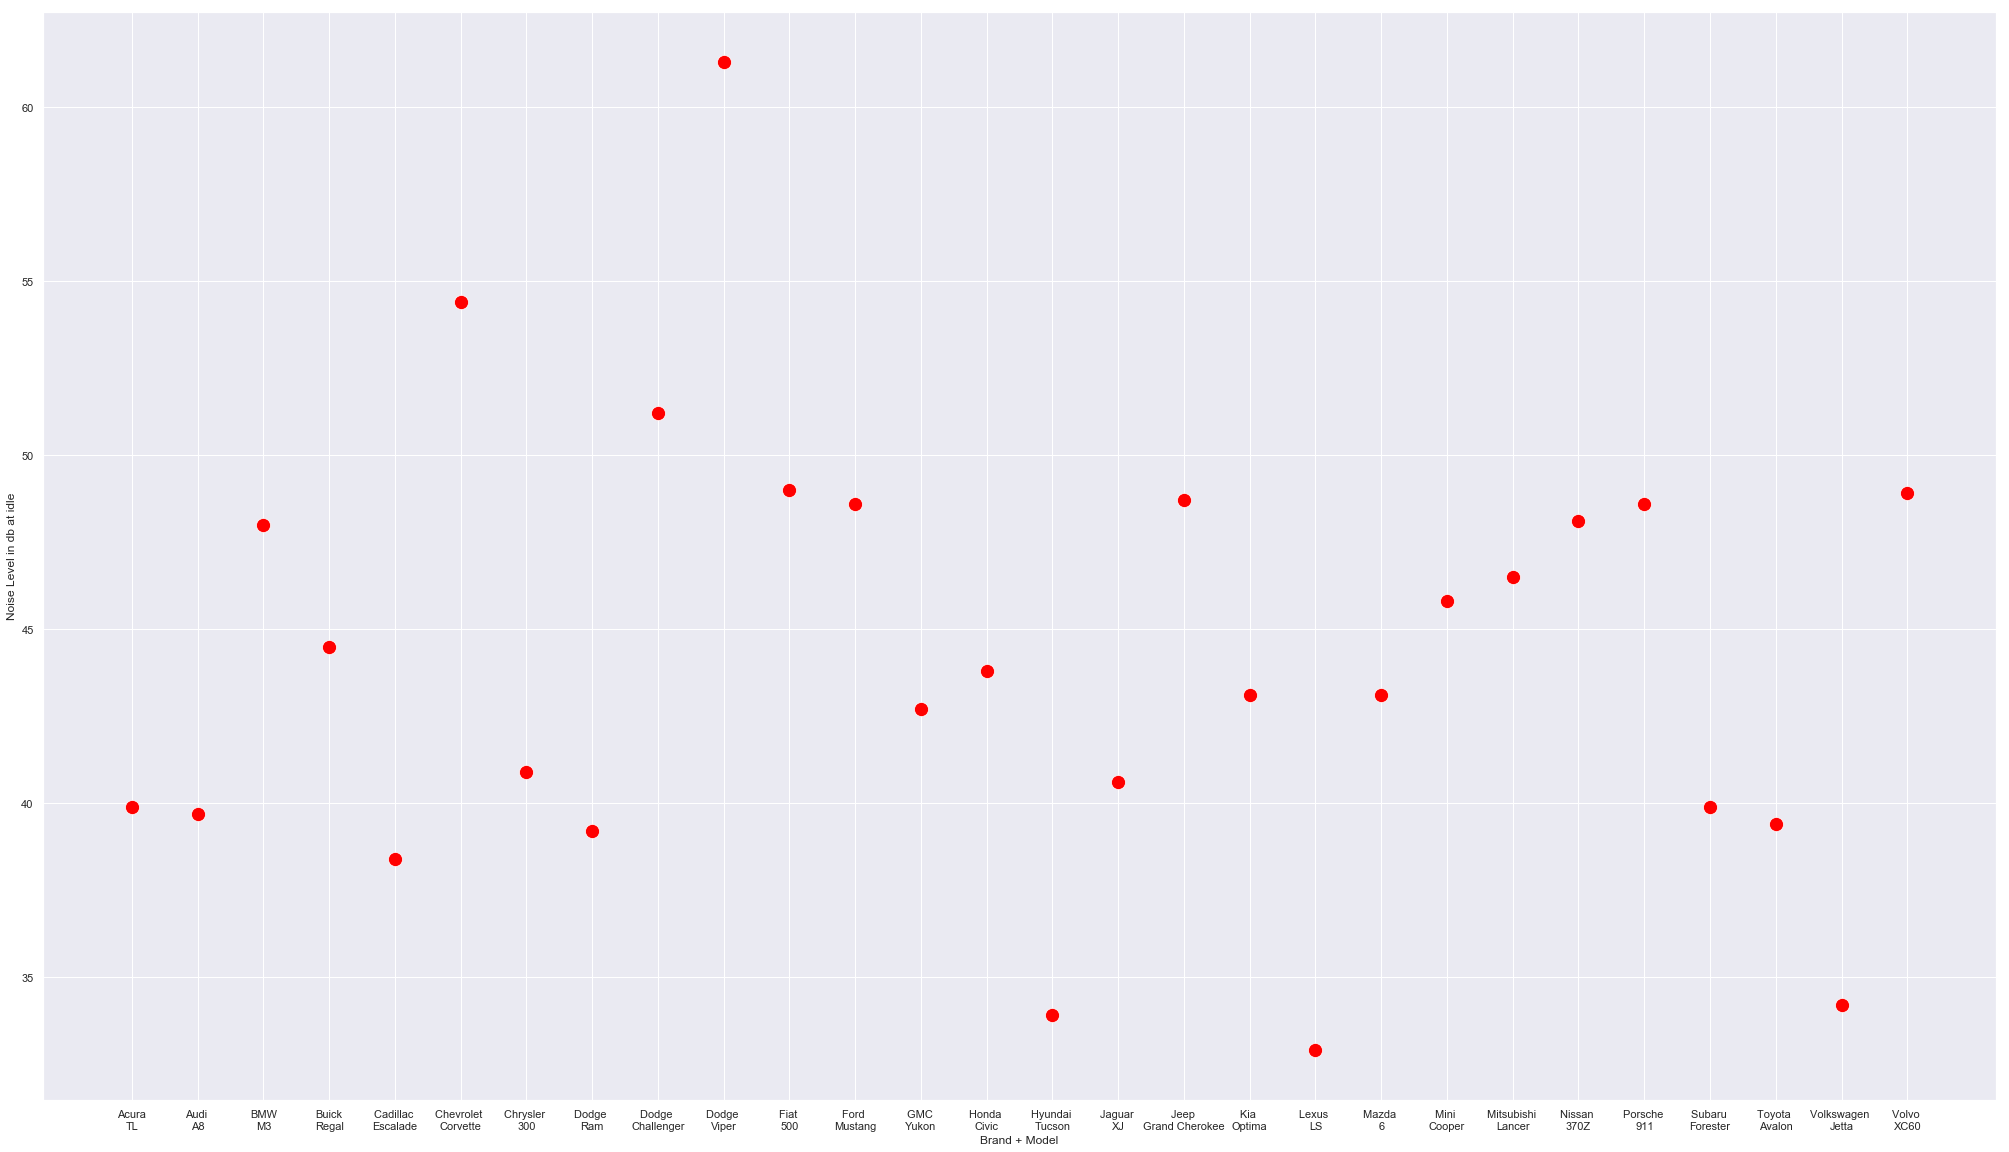

In [106]:
sns.set()
plt.figure(figsize=(35,20))

ax = sns.scatterplot(x="Brand + Model", y="Noise Level in db at idle", 
                     data=ad, color='red',s=200)
# Showing a scatterplot of the all 27 models of the interior noise at idle.

Cars with interior noise more than 50dB at idle (These are noisy)

In [107]:
ag = pd.read_sql("SELECT [Brand + Model], [dB_at_idle] FROM auto_data WHERE [dB_at_idle] >= 50", conn)
ag.rename(
    columns={'dB_at_idle': 'Noise Level in db at idle'}, inplace=True)
ag
# Cars with interior noise more than 50dB at idle.

,Brand + Model,Noise Level in db at idle
0,Chevrolet \nCorvette,54.4
1,Dodge \nChallenger,51.2
2,Dodge \nViper,61.3


Quite cars with interior noise less than 35dB at idle (Much quieter)

In [126]:
ah = pd.read_sql("SELECT [Brand + Model], [dB_at_idle] FROM auto_data WHERE [dB_at_idle] <= 35", conn)
ah.rename(
    columns={'dB_at_idle': 'Noise Level in db at idle'},inplace=True)
ah
# Cars with interior noise less than 35dB at idle.

,Brand + Model,Noise Level in db at idle
0,Hyundai \nTucson,33.9
1,Lexus \nLS,32.9
2,Volkswagen \nJetta,34.2


Showing a scatterplot of the all 27 models of the interior noise at 60 mph

<Figure size 2520x1440 with 0 Axes>

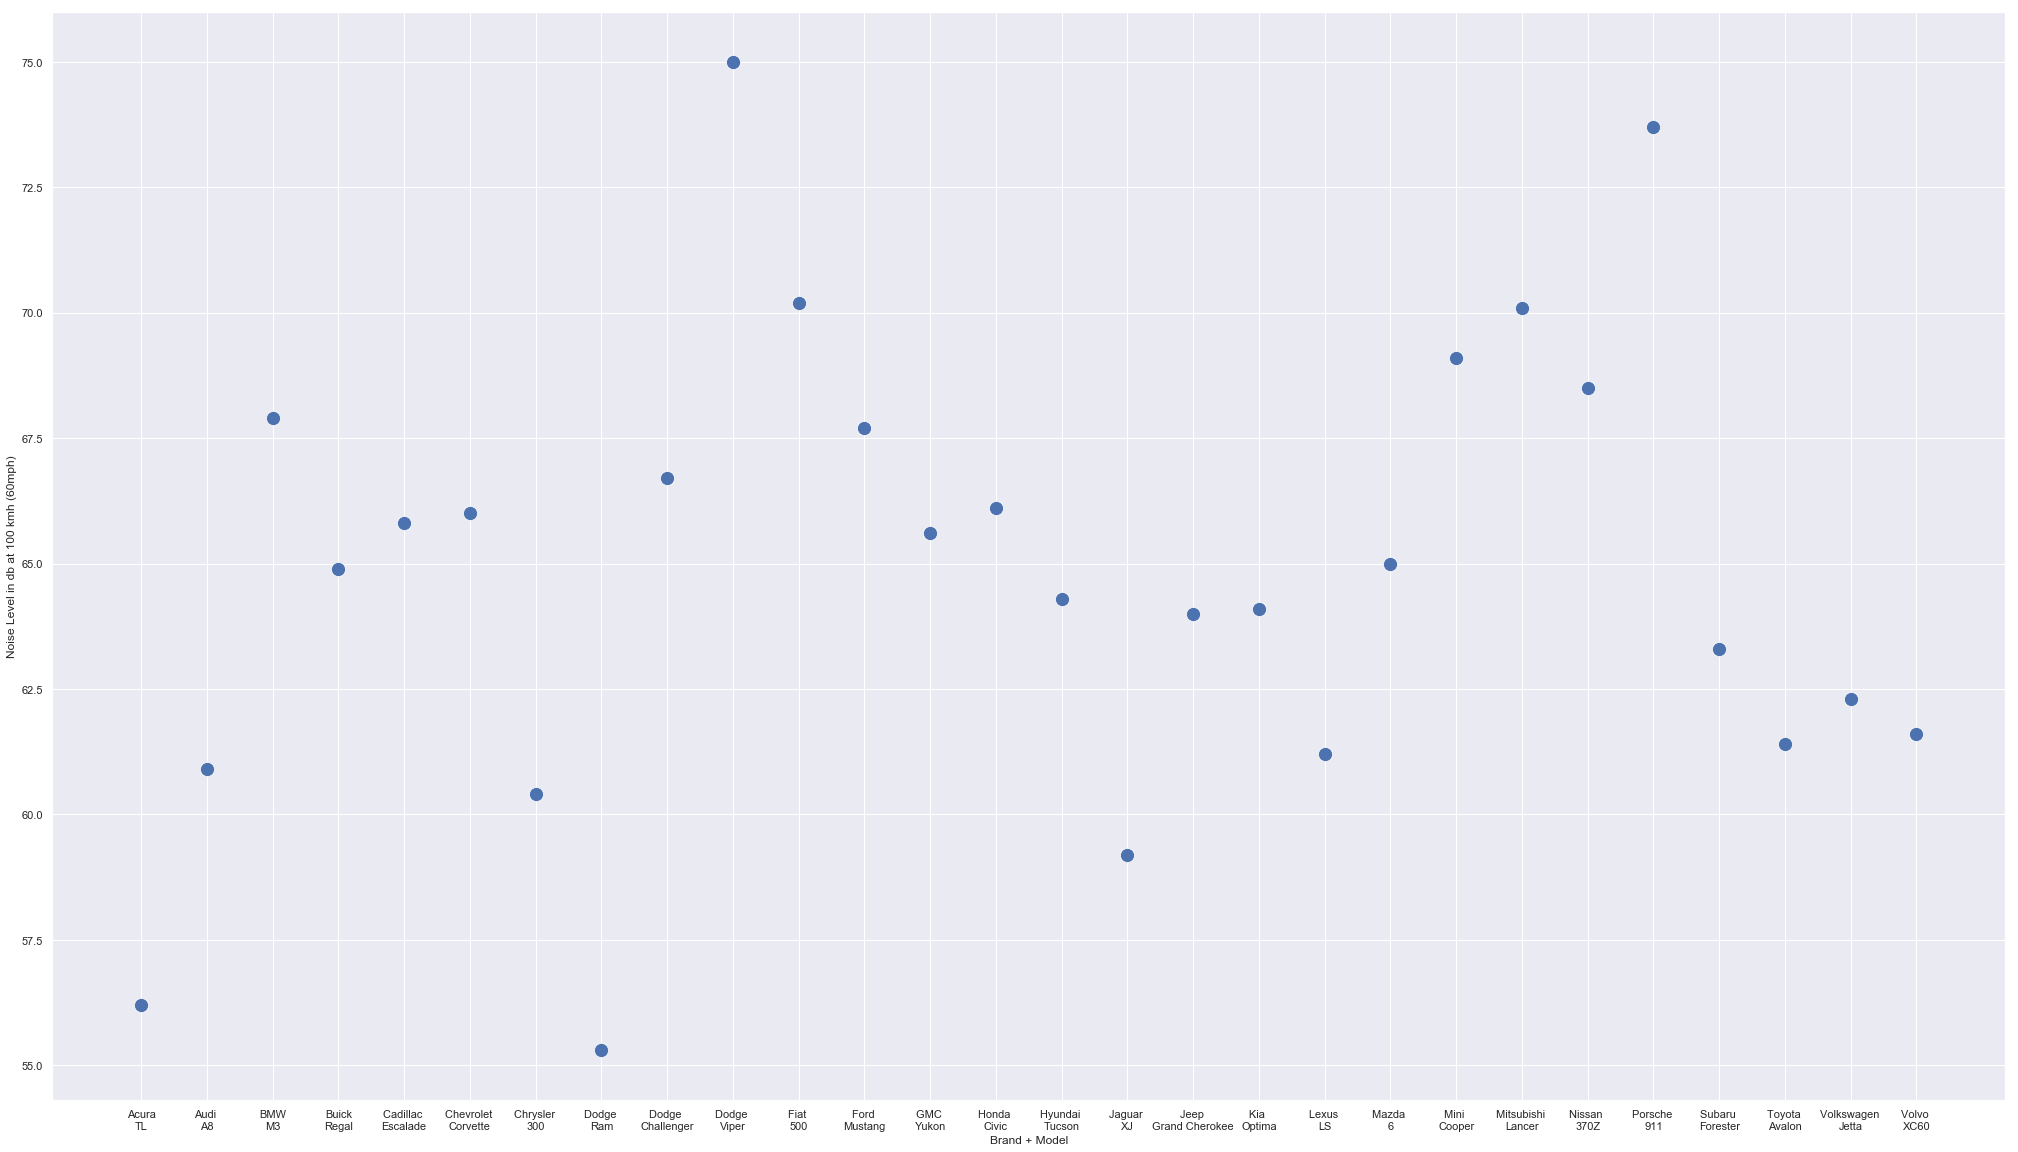

In [109]:
sns.set()
plt.figure(figsize=(35,20))

ax = sns.scatterplot(x="Brand + Model", y="Noise Level in db at 100 kmh (60mph)", data=ad, s=200)

# Showing a scatterplot of the all 27 models of the interior noise at 60 mph.

Cars with interior noise more than 70dB at 60 MPH 

In [110]:
ba = pd.read_sql("SELECT [Brand + Model], [dB_at_100kmh] FROM auto_data WHERE [dB_at_100kmh] >= 70", conn)
ba.rename(
    columns={'dB_at_100kmh': 'Noise Level in db at 100 kmh (60mph)'}, 
    inplace=True)
ba
# Cars with interior noise more than 70dB at 60 MPH.

,Brand + Model,Noise Level in db at 100 kmh (60mph)
0,Dodge \nViper,75.0
1,Fiat \n500,70.2
2,Mitsubishi \nLancer,70.1
3,Porsche \n911,73.7


Cars with interior noise less than 60dB at 60 MPH

In [111]:
bc = pd.read_sql("SELECT [Brand + Model], [dB_at_100kmh] FROM auto_data WHERE [dB_at_100kmh] <= 60", conn)
bc.rename(
    columns={'dB_at_100kmh': 'Noise Level in db at 100 kmh (60mph)'}, 
    inplace=True)
bc
# Cars with interior noise less than 60dB at 60 MPH.

,Brand + Model,Noise Level in db at 100 kmh (60mph)
0,Acura\nTL,56.2
1,Dodge \nRam,55.3
2,Jaguar \nXJ,59.2


CONCLUSION:
At idle the cars with the highest interior noise are sports/muscle cars. You would expect this as the person who buys this type of car would want this characteristic. On the other hand the cars with the lowest noise levels at idle are luxury and midlevel cars. 
At 60MPH the cars with the highest noise levels are sports cars (Dodge Viper noise levels are high at both idle and at 60MPH) and one economy car. It look as if the Fiat was just made cheap and really was not designed for highway driving. For cars at highway speeds the quietest cars were luxury (expected) and one truck (a pleasant suprise). 
    